Bike share sim 
Tracks bikes from Olin College and Wellesley college 
system has 12 bikes  and 2 bike racks with a capicity of 12 

In [100]:
try:
    import pint
except ImportError:
    !pip install pint


In [101]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

In [102]:
from modsim import *

In [103]:
bikeshare = State(olin=10, wellesley=2)

In [104]:
bikeshare.olin

10

In [105]:
bikeshare

olin         10
wellesley     2
Name: state, dtype: int64

In [106]:
show(bikeshare)

,state
olin,10
wellesley,2


In [107]:
def bike_to_wellesley():
    print('Moving a bike to Wellesley')
    bikeshare.olin -= 1
    bikeshare.wellesley += 1

In [108]:
bike_to_wellesley()

Moving a bike to Wellesley


In [109]:
def bike_to_olin():
    print('Moving a bike to Olin')
    bikeshare.olin += 1
    bikeshare.wellesley -= 1

In [110]:
bike_to_olin()

Moving a bike to Olin


In [111]:
print(bikeshare)

olin         10
wellesley     2
Name: state, dtype: int64


In [112]:
np.random.seed(17)

In [113]:
flip(.7)

True

In [114]:
if flip(.5):
    print('heads')
else:
    print('tails')


tails


In [115]:
if flip(0.5):
    bike_to_wellesley()

Moving a bike to Wellesley


In [116]:
if flip(0.33):
    bike_to_olin()

Moving a bike to Olin


In [117]:
def step():
    if flip(0.5):
        bike_to_wellesley()
    
    if flip(0.33):
        bike_to_olin()

In [118]:
step()

In [119]:
def step(p1, p2):
    if flip(p1):
        bike_to_wellesley()
    
    if flip(p2):
        bike_to_olin()

In [120]:
step(0.5, 0.33)

In [121]:
p1 = 0.5
p2 = 0.33

if flip(p1):
    bike_to_wellesley()
    
if flip(p2):
    bike_to_olin()

Moving a bike to Wellesley


In [122]:
step(0.5, 0.33)

Moving a bike to Olin


In [123]:
for i in range(3):
    print(i)
    bike_to_wellesley()

0
Moving a bike to Wellesley
1
Moving a bike to Wellesley
2
Moving a bike to Wellesley


In [124]:
for i in range(3):
    print(i)
    bike_to_olin()

0
Moving a bike to Olin
1
Moving a bike to Olin
2
Moving a bike to Olin


In [125]:
bikeshare = State(olin=10, wellesley=2)

In [126]:
results = TimeSeries()

In [127]:
results[0] = bikeshare.olin

In [128]:
for i in range(3):
    print(i)
    step(0.6, 0.6)
    results[i+1] = bikeshare.olin

0
1
Moving a bike to Wellesley
2
Moving a bike to Wellesley
Moving a bike to Olin


In [129]:
show(results)

,Quantity
Time,
0,10
1,10
2,9
3,9


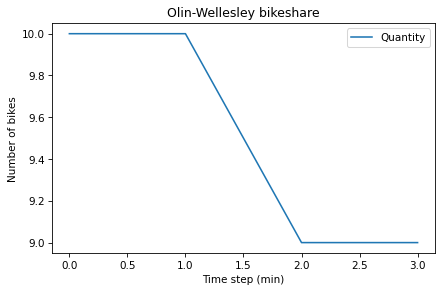

In [130]:
results.plot()

decorate(title='Olin-Wellesley bikeshare',
         xlabel='Time step (min)', 
         ylabel='Number of bikes')